In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Persuasion for Good dataset along with metrics information

In [2]:
PFG_METRICS_FILE = 'data/pfg_metrics.csv'

pfg_metrics = pd.read_csv(PFG_METRICS_FILE)

In [3]:
feature_cols = [x for x in pfg_metrics.columns if x not in ("B2", "Combined_Text")]


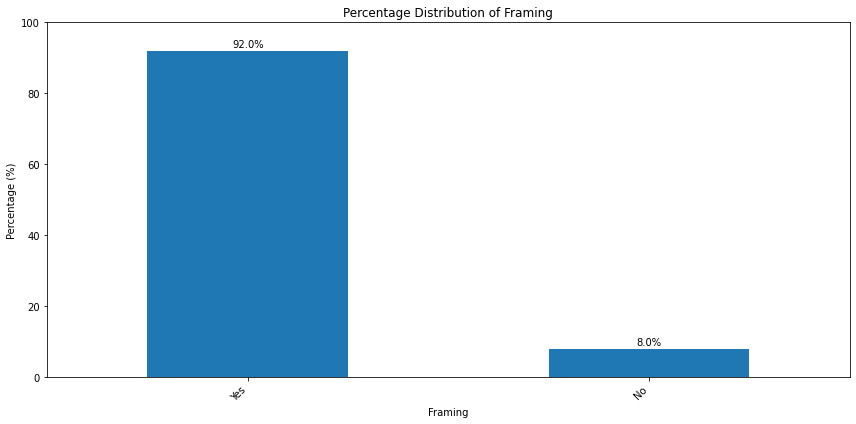

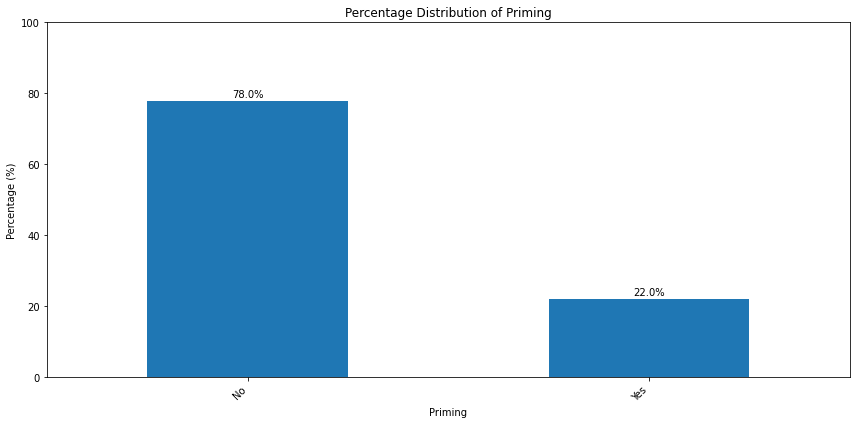

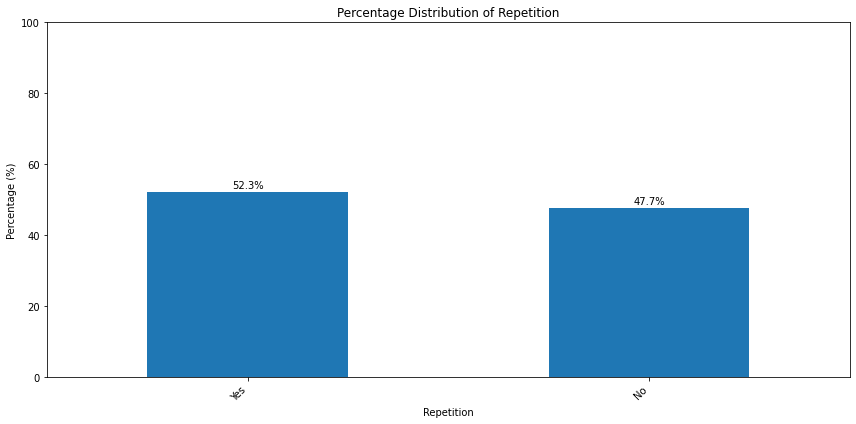

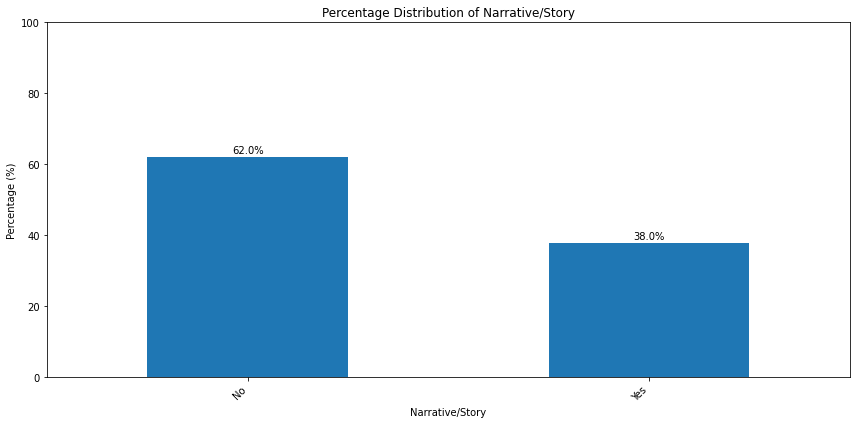

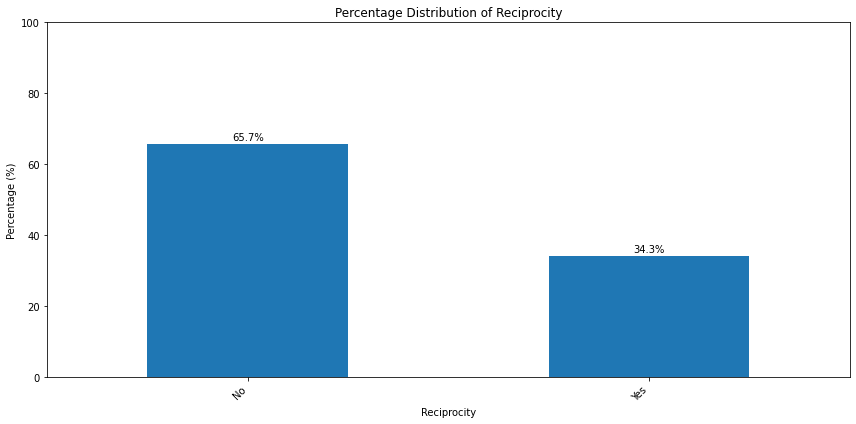

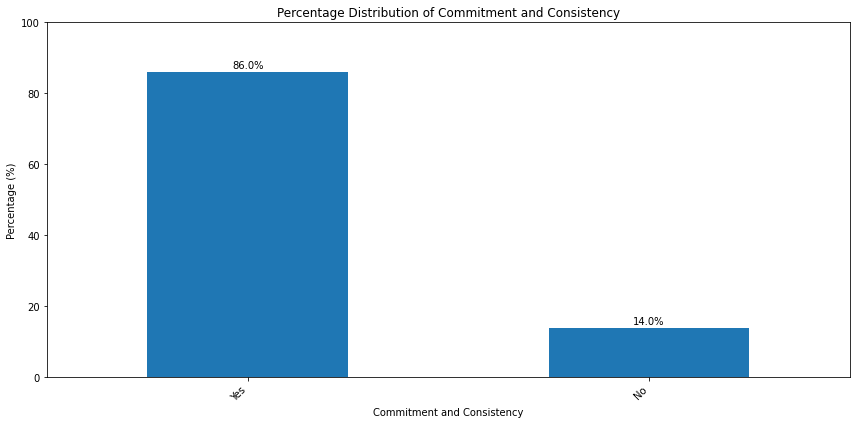

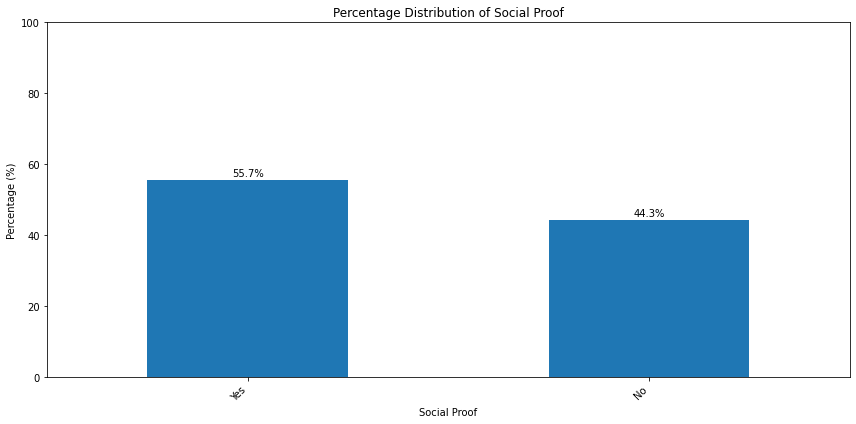

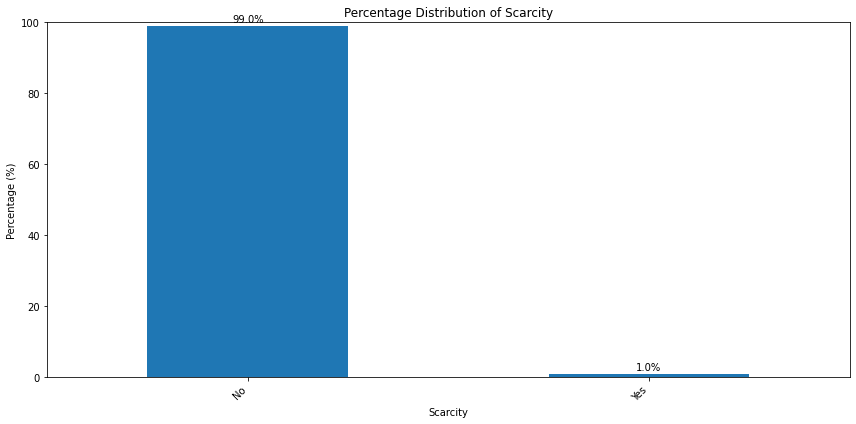

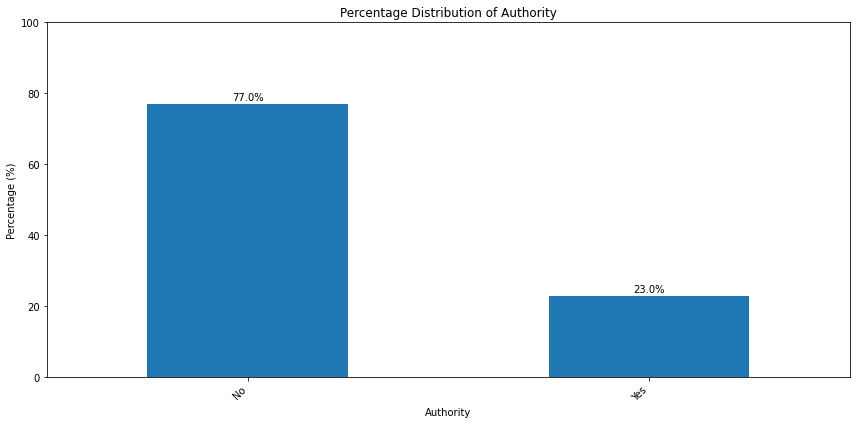

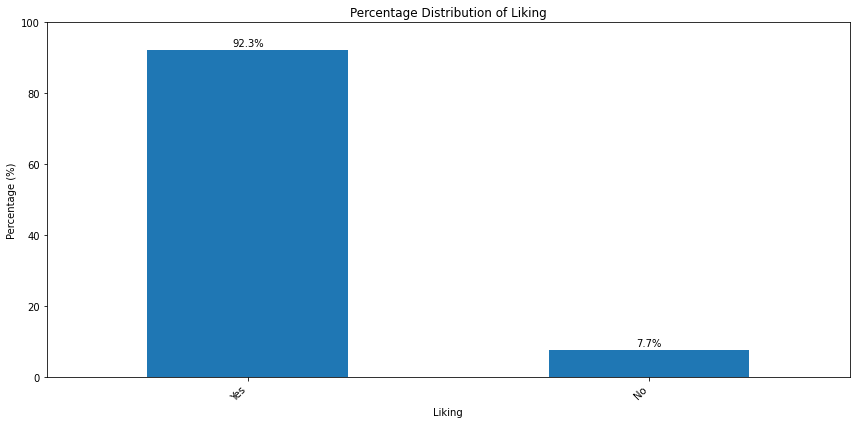

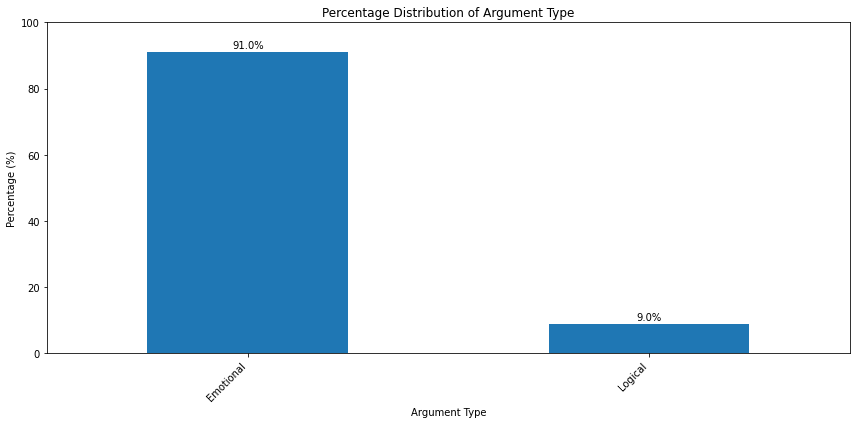

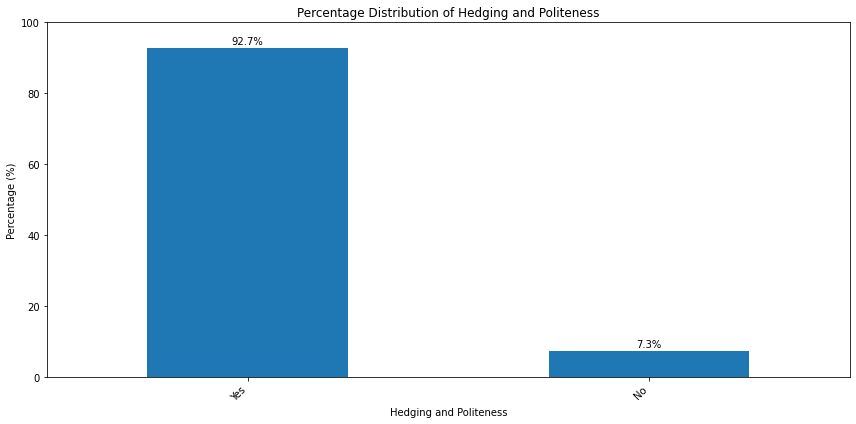

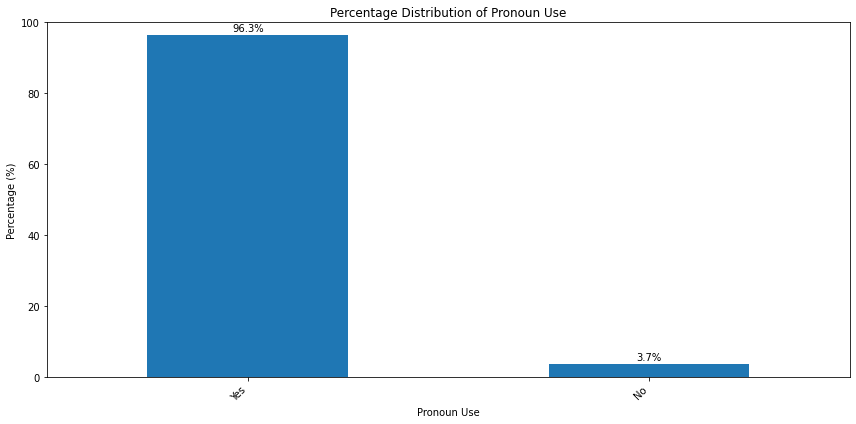

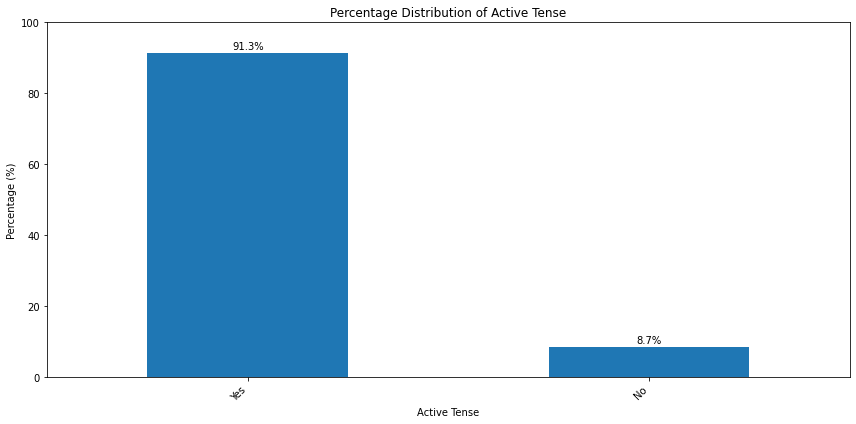

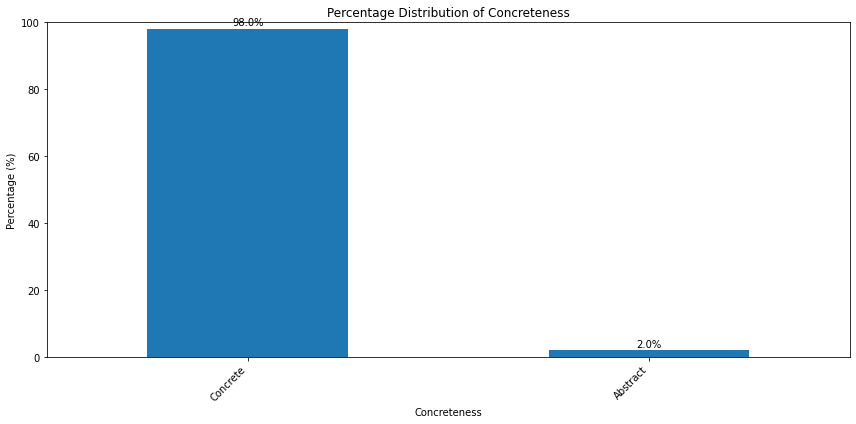

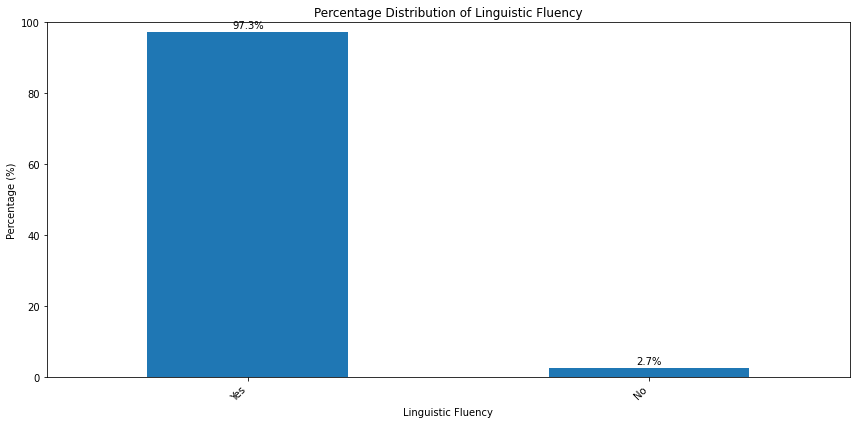

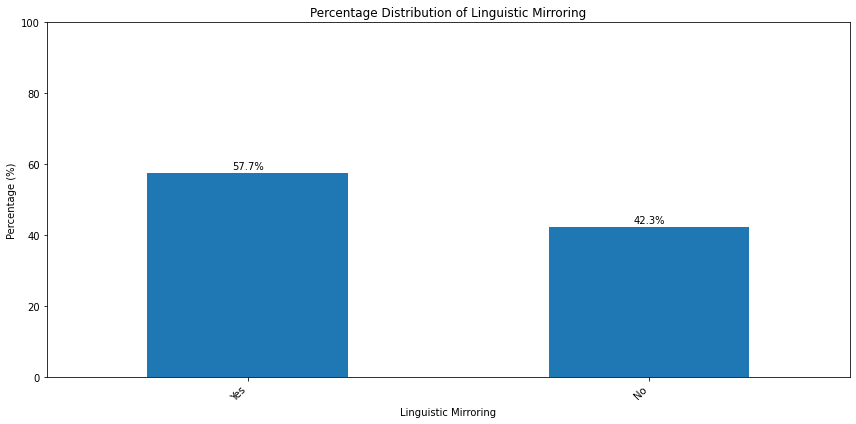

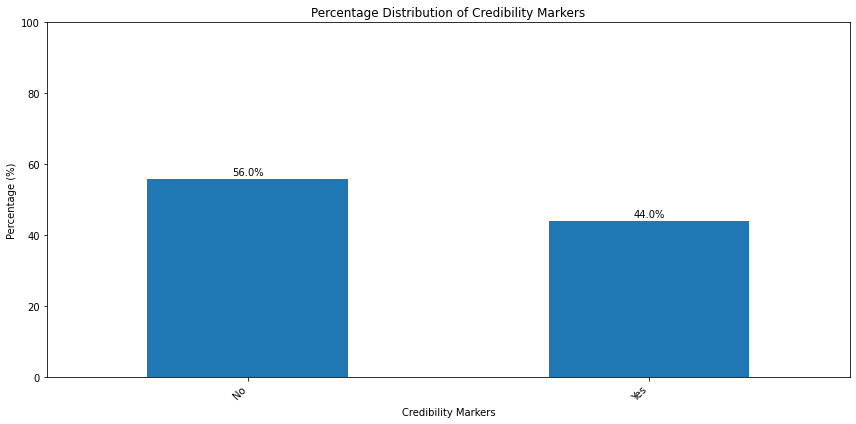

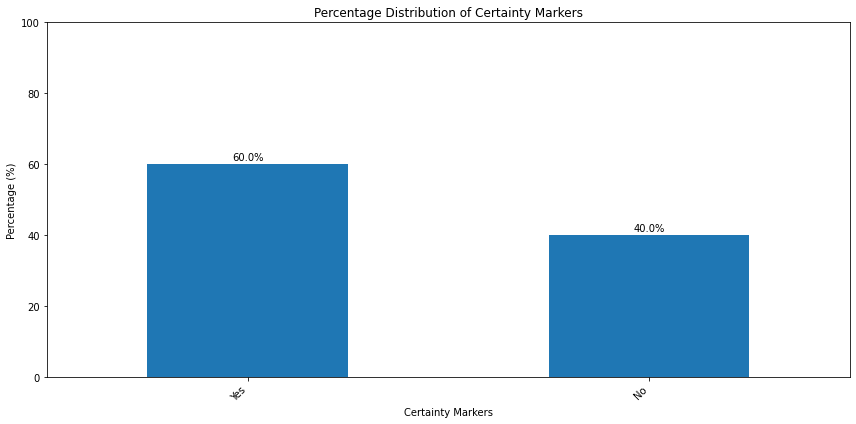

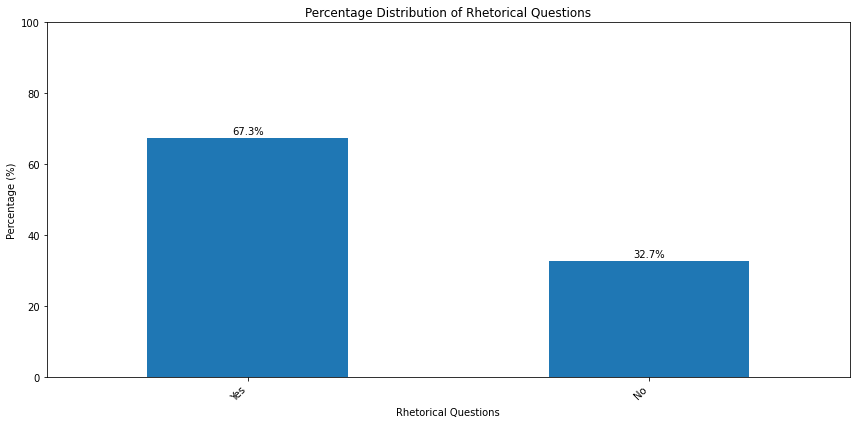

In [5]:
def visualize_percentage_distribution(df, cols):
    """
    Visualize the percentage distribution of specified columns in a DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The DataFrame containing the data.
    cols (list): List of column names to visualize.
    """
    for col in cols:
        # Calculate percentage distribution
        percentage_dist = df[col].value_counts(normalize=True) * 100
        
        # Create the bar plot
        plt.figure(figsize=(12, 6))
        percentage_dist.plot(kind='bar')
        
        # Customize the plot
        plt.title(f'Percentage Distribution of {col}')
        plt.xlabel(col)
        plt.ylabel('Percentage (%)')
        plt.ylim(0, 100)
        
        # Rotate x-axis labels for better readability
        plt.xticks(rotation=45, ha='right')
        
        # Add percentage labels on top of each bar
        for i, v in enumerate(percentage_dist):
            plt.text(i, v + 0.5, f'{v:.1f}%', ha='center', va='bottom')
        
        # Adjust layout and display the plot
        plt.tight_layout()
        plt.show()
    
# Visualize the percentage distribution of the columns
visualize_percentage_distribution(pfg_metrics, feature_cols)

## Merge the information of Persuasion to this data

In [6]:
info_data = pd.read_excel('data/persuasion_for_good/300_info.xlsx', sheet_name='Sheet1')
# Remove persuader data for now to get the persuasion data
info_data = info_data[info_data['B4'] != 0]
info_data['B5'] = info_data['B5'].fillna(0)
info_data['B6'] = info_data['B6'].fillna(0)

info_data['persuasion'] = info_data['B6'] - info_data['B5']

increase_df = info_data[info_data['persuasion'] > 0]
decrease_df = info_data[info_data['persuasion'] < 0]
same_df = info_data[info_data['persuasion'] == 0]

print(f"Average increase: {increase_df['persuasion'].mean()}")
print(f"Average decrease: {decrease_df['persuasion'].mean()}")
print(f"Average same: {same_df['persuasion'].mean()}")

Average increase: 1.8223255813953492
Average decrease: -107.30152777777779
Average same: 0.0


In [7]:
info_data.head(2)

,B2,B3,B4,B5,B6,B7,persuasion
1,20180717-200206_41_live,user_1494,1,0.5,0.5,10.0,0.0
3,20180719-120436_413_live,user_1363,1,0.0,0.0,10.0,0.0


In [8]:
pfg_metrics.head(2)

,B2,Combined_Text,Framing,Priming,Repetition,Narrative/Story,Reciprocity,Commitment and Consistency,Social Proof,Scarcity,...,Argument Type,Hedging and Politeness,Pronoun Use,Active Tense,Concreteness,Linguistic Fluency,Linguistic Mirroring,Credibility Markers,Certainty Markers,Rhetorical Questions
0,20180717-200206_41_live,"Persuader: Hey, how are you doing, have you ev...",Yes,No,Yes,Yes,No,Yes,No,No,...,Emotional,Yes,Yes,Yes,Concrete,Yes,No,No,No,Yes
1,20180719-120436_413_live,Persuader: Hi there\r\nPersuadee: Hello\r\nPer...,Yes,Yes,Yes,Yes,No,Yes,Yes,No,...,Emotional,Yes,Yes,Yes,Concrete,Yes,Yes,No,Yes,Yes


In [9]:
data_df = pd.merge(pfg_metrics, info_data, on='B2', how='inner')
data_df

,B2,Combined_Text,Framing,Priming,Repetition,Narrative/Story,Reciprocity,Commitment and Consistency,Social Proof,Scarcity,...,Linguistic Mirroring,Credibility Markers,Certainty Markers,Rhetorical Questions,B3,B4,B5,B6,B7,persuasion
0,20180717-200206_41_live,"Persuader: Hey, how are you doing, have you ev...",Yes,No,Yes,Yes,No,Yes,No,No,...,No,No,No,Yes,user_1494,1,0.5,0.50,10.0,0.00
1,20180719-120436_413_live,Persuader: Hi there\r\nPersuadee: Hello\r\nPer...,Yes,Yes,Yes,Yes,No,Yes,Yes,No,...,Yes,No,Yes,Yes,user_1363,1,0.0,0.00,10.0,0.00
2,20180719-122534_38_live,Persuader: It would be really helpful if you d...,Yes,Yes,Yes,Yes,No,Yes,No,No,...,No,No,Yes,No,user_1222,1,5.0,0.50,11.0,-4.50
3,20180719-165941_192_live,"Persuader: Hello\r\nPersuadee: Yea, hello.\r\n...",Yes,No,No,Yes,No,Yes,No,No,...,No,No,Yes,Yes,user_845,1,50.0,0.00,10.0,-50.00
4,20180719-175233_833_live,Persuader: Hey there\r\nPersuadee: Hey how's i...,Yes,Yes,No,Yes,Yes,Yes,No,No,...,No,No,Yes,Yes,user_324,1,0.0,0.05,10.0,0.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,20180904-030739_178_live,Persuader: Do you ever donate to charity?\r\nP...,Yes,Yes,No,No,Yes,No,Yes,No,...,No,Yes,Yes,Yes,user_621,1,0.0,0.00,10.0,0.00
296,20180904-032932_423_live,Persuader: Hello.\r\nPersuader: Would you like...,Yes,No,Yes,No,No,Yes,Yes,No,...,Yes,Yes,Yes,Yes,user_1169,1,1.0,1.00,11.0,0.00
297,20180904-043300_214_live,Persuader: Hi!\r\nPersuader: How are you doing...,No,No,No,No,No,No,No,No,...,Yes,Yes,No,No,user_1473,1,0.0,0.00,10.0,0.00
298,20180904-045349_715_live,Persuader: Good morning.\r\nPersuader: How are...,Yes,No,Yes,No,Yes,No,Yes,No,...,Yes,Yes,No,No,user_1810,1,0.2,0.00,11.0,-0.20


In [10]:
# Label encode the categorical columns except the columns ['B2', 'Combined_Text', 'persuasion', 'B3', 'B4', 'B5', 'B6', 'B7']
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
categorical_cols = [col for col in data_df.columns if col not in ['B2', 'Combined_Text', 'persuasion', 'B3', 'B4', 'B5', 'B6', 'B7']]
data_df[categorical_cols] = data_df[categorical_cols].apply(label_encoder.fit_transform)


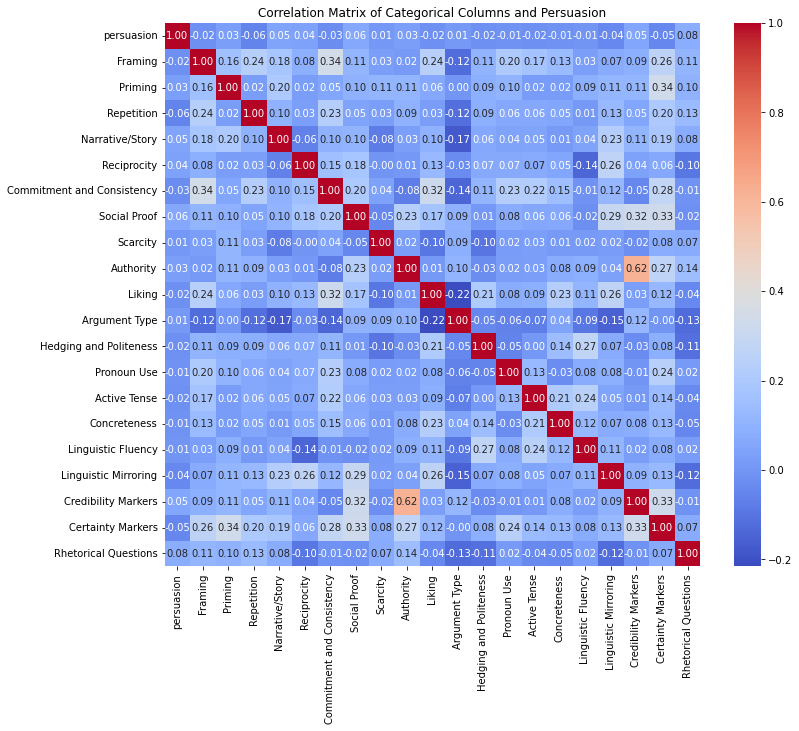

In [11]:
# Pairplot of categorical columns and the persuasion column
# sns.pairplot(data_df[['persuasion'] + categorical_cols])


# Correlation matrix of the categorical columns and the persuasion column
corr = data_df[['persuasion'] + categorical_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Categorical Columns and Persuasion')
plt.show()

Mean Squared Error: 1669358.83
R^2 Score: -0.02


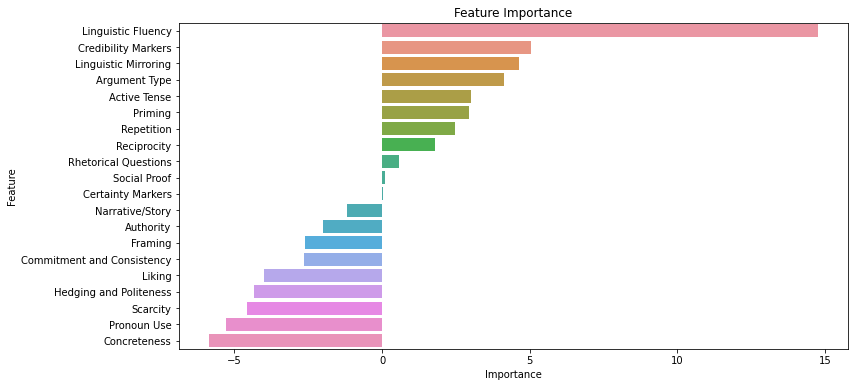

In [12]:
# Fit a linear regression model to predict the persuasion column using the categorical columns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = data_df[categorical_cols]
y = data_df['persuasion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Feature importance
importance = model.coef_
feature_importance = pd.DataFrame(importance, index=categorical_cols, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y=feature_importance.index, data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


Mean Squared Error: 1669486.68
R^2 Score: -0.02


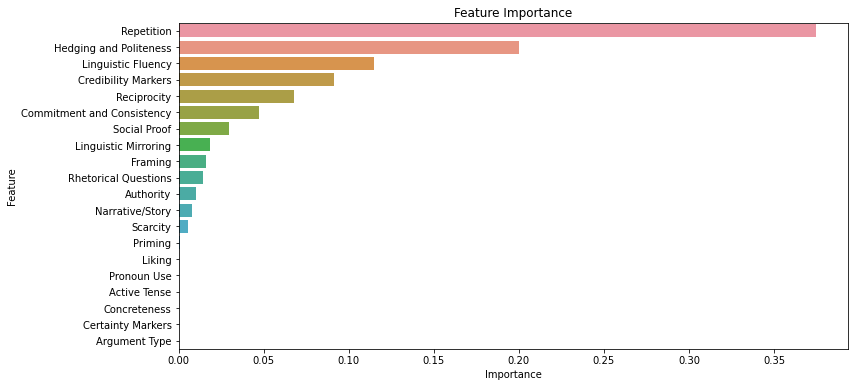

In [13]:
# Fit a decision tree model to predict the persuasion column using the categorical columns

from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree

# Reduce the overfitting by setting the max_depth to 5
model = DecisionTreeRegressor(max_depth=5)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Feature importance
importance = model.feature_importances_
feature_importance = pd.DataFrame(importance, index=categorical_cols, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y=feature_importance.index, data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

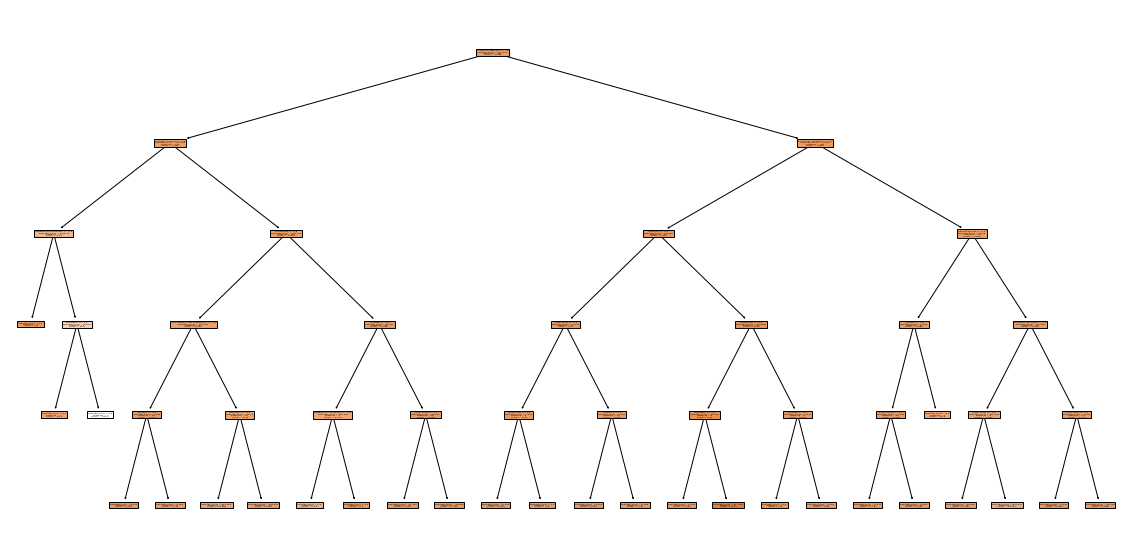

In [14]:
# Visualize the decision tree
plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=categorical_cols, filled=True)
plt.show()

Mean Squared Error: 1664598.51
R^2 Score: -0.02


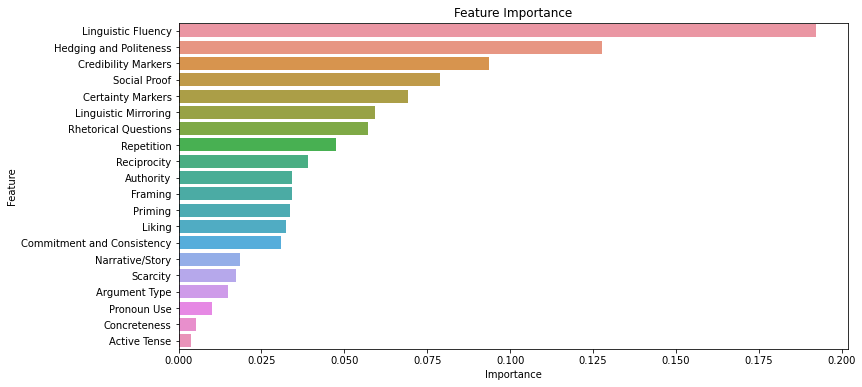

In [15]:
# XGBoost model
from xgboost import XGBRegressor

model = XGBRegressor()
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R^2 Score: {r2:.2f}')

# Feature importance
importance = model.feature_importances_
feature_importance = pd.DataFrame(importance, index=categorical_cols, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y=feature_importance.index, data=feature_importance)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


In [16]:
!pip install xgboost


[notice] A new release of pip is available: 23.0.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:


# # Remove the outliers from the persuasion column
# from scipy.stats import zscore

# data_df['z_score'] = zscore(data_df['persuasion'])


# # Remove the rows with z-score greater than 3 or less than -3
# data_df = data_df[(data_df['z_score'] < 3) & (data_df['z_score'] > -3)]

# # Fit a linear regression model to predict the persuasion column using the categorical columns
# X = data_df[categorical_cols]
# y = data_df['persuasion']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = LinearRegression()
# model.fit(X_train, y_train)

# # Evaluate the model
# y_pred = model.predict(X_test)

# mse = mean_squared_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print(f'Mean Squared Error: {mse:.2f}')
# print(f'R^2 Score: {r2:.2f}')

In [18]:
# # Fit a decision tree model to predict the persuasion column using the categorical columns

# # Distruibution of the z-score
# data_df['z_score'].hist(bins=20)